In [1]:
import numpy as np
import pandas as pd
import scipy
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import ipdb

# generate data

## 4 types of GalSim images

In [16]:
#### 1000 training images

with open("data/galsim_simulated_2500gals_lambda0.4_theta3.14159_2021-05-20-17-01.pkl", 'rb') as handle:
    group1 = pickle.load(handle)
with open("data/galsim_simulated_2500gals_lambda0.4_theta2.3562_2021-05-20-17-42.pkl", 'rb') as handle:
    group2 = pickle.load(handle)
with open("data/galsim_simulated_2500gals_lambda0.4_theta1.5708_2021-05-20-17-08.pkl", 'rb') as handle:
    group3 = pickle.load(handle)
with open("data/galsim_simulated_2500gals_lambda0.4_theta0.7854_2021-05-20-17-44.pkl", 'rb') as handle:
    group4 = pickle.load(handle)

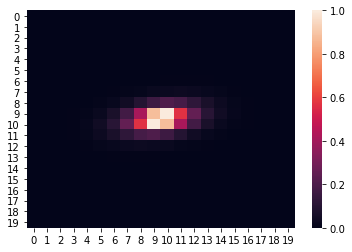

In [17]:
sns.heatmap(group1['galaxies_generated'][0])
plt.show()

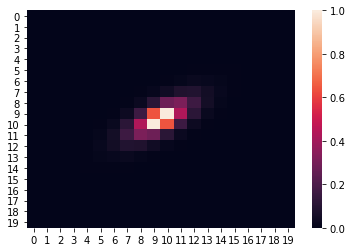

In [18]:
sns.heatmap(group2['galaxies_generated'][0])
plt.show()

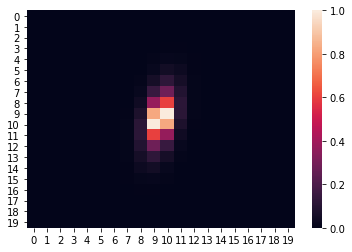

In [19]:
sns.heatmap(group3['galaxies_generated'][0])
plt.show()

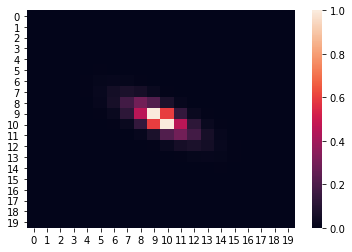

In [20]:
sns.heatmap(group4['galaxies_generated'][0])
plt.show()

In [47]:
#### 1000 test images

with open("data/galsim_simulated_250gals_lambda0.4_theta3.14159_2021-05-20-18-14.pkl", 'rb') as handle:#
    test1 = pickle.load(handle)
with open("data/galsim_simulated_250gals_lambda0.4_theta2.3562_2021-05-20-18-14.pkl", 'rb') as handle:
    test2 = pickle.load(handle)
with open("data/galsim_simulated_250gals_lambda0.4_theta1.5708_2021-05-20-18-14.pkl", 'rb') as handle:
    test3 = pickle.load(handle)
with open("data/galsim_simulated_250gals_lambda0.4_theta0.7854_2021-05-20-18-14.pkl", 'rb') as handle:
    test4 = pickle.load(handle)

In [48]:
gal_img1 = group1['galaxies_generated']
gal_img2 = group2['galaxies_generated']
gal_img3 = group3['galaxies_generated']
gal_img4 = group4['galaxies_generated']
all_gal_imgs = np.vstack([gal_img1, gal_img2, gal_img3, gal_img4])
all_gal_imgs.shape

(10000, 20, 20)

In [49]:
test_img1 = test1['galaxies_generated']
test_img2 = test2['galaxies_generated']
test_img3 = test3['galaxies_generated']
test_img4 = test4['galaxies_generated']
all_test_imgs = np.vstack([test_img1, test_img2, test_img3, test_img4])
all_test_imgs.shape

(1000, 20, 20)

In [50]:
all_train_test_imgs = np.vstack([all_gal_imgs, all_test_imgs])
all_train_test_imgs.shape

(11000, 20, 20)

In [51]:
#with open('galsim_conformal_imgs_20210520.pkl', 'wb') as handle:
#    pickle.dump(all_train_test_imgs, handle, protocol=pickle.HIGHEST_PROTOCOL)

## 4 distributions with same mean and variance (gaussian, uniform, exponential, bimodal)

In [26]:
# N(1,1)
z1 = np.random.normal(1, 1, size=2500)

In [25]:
# Unif(1-sqrt(3),1+sqrt(3))
z2 = np.random.uniform(1-np.sqrt(3), 1+np.sqrt(3), size=2500)

In [24]:
# Expo(1)
z3 = np.random.exponential(1, size=2500)

In [37]:
# 0.5N(0.25,0.4375) + 0.5N(1.75,0.4375)
z4_ind = np.random.binomial(n=1, p=0.5, size=2500)
z4 = z4_ind*np.random.normal(0.25, 0.4375, size=2500) + (1-z4_ind)*np.random.normal(1.75, 0.4375, size=2500)

C:\Users\dzhao\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dzhao\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dzhao\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

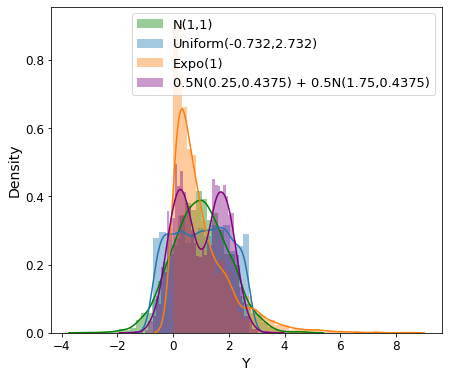

In [40]:
fig, ax = plt.subplots(figsize=(7,6))
sns.distplot(z1, color='green', label='N(1,1)', ax=ax)
sns.distplot(z2, label='Uniform(-0.732,2.732)', ax=ax)
sns.distplot(z3, label='Expo(1)', ax=ax)
sns.distplot(z4, color='purple', label='0.5N(0.25,0.4375) + 0.5N(1.75,0.4375)', bins=50, ax=ax)

plt.legend(fontsize=13)
plt.xlabel('Y', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.savefig('z_dists_v1.pdf')

In [41]:
all_zs = np.hstack([z1, z2, z3, z4])

In [42]:
test_z1 = np.random.normal(1, 1, size=250)
test_z2 = np.random.uniform(1-np.sqrt(3), 1+np.sqrt(3), size=250)
test_z3 = np.random.exponential(1, size=250)
test_z4_ind = np.random.binomial(n=1, p=0.5, size=250)
test_z4 = test_z4_ind*np.random.normal(0.25, 0.4375, size=250) + (1-test_z4_ind)*np.random.normal(1.75, 0.4375, size=250)

In [43]:
all_test_zs = np.hstack([test_z1, test_z2, test_z3, test_z4])

In [44]:
all_train_test_zs = np.hstack([all_zs, all_test_zs])

In [52]:
#with open('z_conformal_20210520.pkl', 'wb') as handle:
#    pickle.dump(all_train_test_zs, handle, protocol=pickle.HIGHEST_PROTOCOL)

# fit neural density model

# run CDE diagnostics

# conformal approach